# Importing libraries

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision import transforms
import matplotlib.pyplot as plt

# Device configuration

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# Loading Dataset

In [10]:
# Load MNIST dataset
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

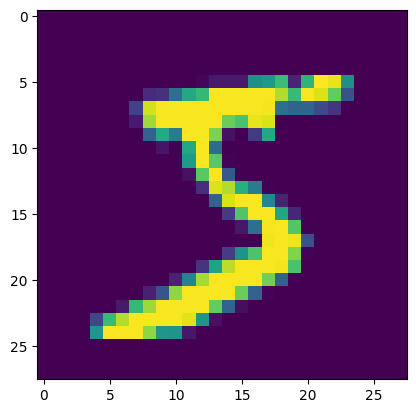

In [11]:
# Plot the first image in the training dataset
plt.imshow(train_dataset.data[0])

# Create Data Loaders for the Train and Test Datasets

In [12]:
#Define batch size
batch_size = 32

# Data Loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

AttributeError: 'DataLoader' object has no attribute 'to'

# Hyperparameters

In [44]:
# Insantiating Hyperparameters
input_size = 784
num_classes = 10
learning_rate = 0.001
EPOCHS = 10

# Logistic Regression Model

In [45]:
model = nn.Linear(input_size, num_classes).to(device)

# Loss and optimizer

In [46]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training and Testing the model

In [47]:
# Creating lists to keep track of loss and accuracy
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(EPOCHS):

    #Train the model
    train_count = 0
    train_correct = 0
    total_train_loss = 0
    total_test_loss = 0

    for i, (images, labels) in enumerate(train_loader):
        bs = images.size(0)
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate loss
        cost = loss(outputs, labels)
        total_train_loss += cost.item()

        # Backward and optimize
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        # Track train accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_count += bs
        train_correct += (predicted == labels).sum().item()

    train_accuracy.append(train_correct/train_count)
    train_loss.append(total_train_loss/len(train_loader))

    print(f'Epoch: {epoch+1}/{EPOCHS}, Loss = {cur_loss:.4f}, Train Accuracy = {train_accuracy[-1]:.4f}')

    # Test the model
    test_count = 0
    test_correct = 0

    model.eval()
    for images, labels in test_loader:
        bs = images.size(0)
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate loss
        cost = loss(outputs, labels)
        total_test_loss += cost.item()

        # Track test accuracy
        _, predicted = torch.max(outputs.data, 1)
        test_count += bs
        test_correct += (predicted == labels).sum().item()

    test_accuracy.append(test_correct/test_count)
    cur_loss = total_test_loss/len(test_loader)
    test_loss.append(cur_loss)

    print(f'Test Accuracy = {test_accuracy[-1]:.4f}')


Epoch: 1/10, Loss = 0.4621, Train Accuracy = 0.8841
Test Accuracy = 0.9175
Epoch: 2/10, Loss = 0.3028, Train Accuracy = 0.9153
Test Accuracy = 0.9244
Epoch: 3/10, Loss = 0.2828, Train Accuracy = 0.9204
Test Accuracy = 0.9259
Epoch: 4/10, Loss = 0.2725, Train Accuracy = 0.9241
Test Accuracy = 0.9245
Epoch: 5/10, Loss = 0.2664, Train Accuracy = 0.9259
Test Accuracy = 0.9273
Epoch: 6/10, Loss = 0.2615, Train Accuracy = 0.9274
Test Accuracy = 0.9275
Epoch: 7/10, Loss = 0.2583, Train Accuracy = 0.9286
Test Accuracy = 0.9271
Epoch: 8/10, Loss = 0.2551, Train Accuracy = 0.9288
Test Accuracy = 0.9284
Epoch: 9/10, Loss = 0.2529, Train Accuracy = 0.9296
Test Accuracy = 0.9274
Epoch: 10/10, Loss = 0.2506, Train Accuracy = 0.9308
Test Accuracy = 0.9272


# Plotting Loss and Accuracy

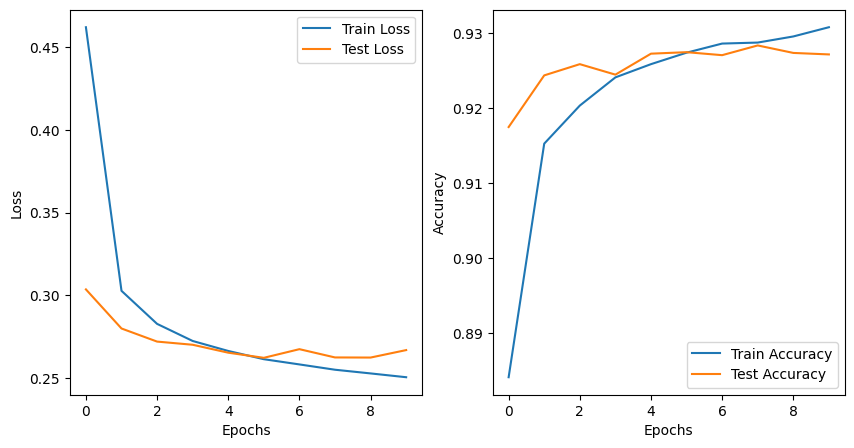

In [48]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the First 16 Images with their Predictions

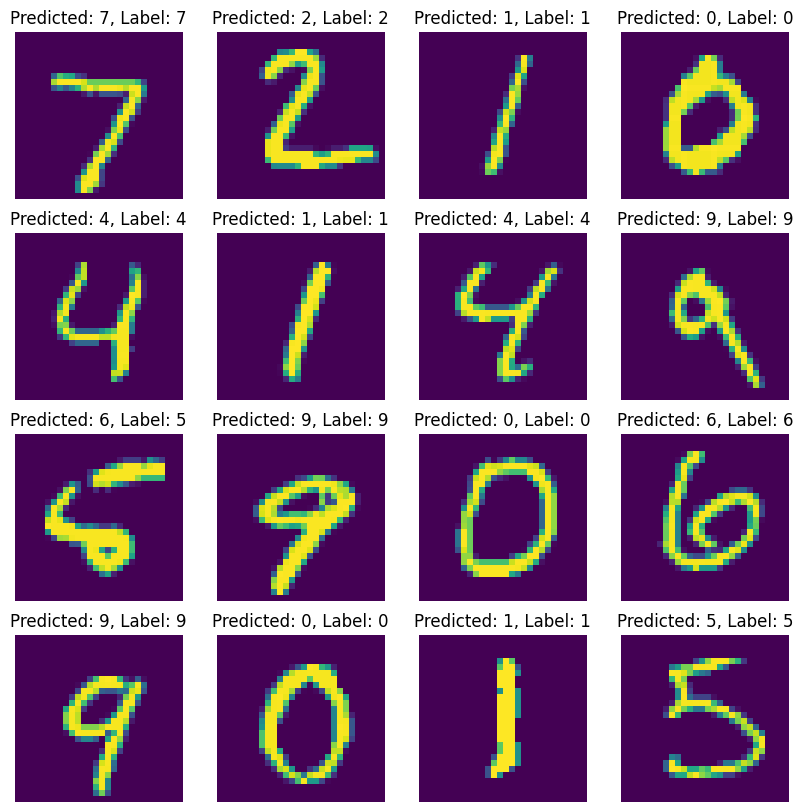

In [50]:
plt.figure(figsize=(10, 10))

model.eval()
with torch.no_grad():
    for i in range(16):
        plt.subplot(4, 4, i+1)
        image, label = test_dataset[i]
        image = image.reshape(-1, 28*28).to(device)
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        plt.imshow(image.cpu().reshape(28, 28))
        plt.title(f'Predicted: {predicted.item()}, Label: {label}')
        plt.axis('off')
plt.show()